In [1]:
# Import necessary libraries
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from kedro.io import DataCatalog
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
# Load datasets
medications_df = catalog.load("medications")
print("Medications data loaded..")

                    INFO     Loading data from medications (CSVDataset)...                      ]8;id=965696;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=275641;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

Medications data loaded..


In [4]:
# 1. Display Basic Information
def basic_info(df):
    print("Dataset Shape:", df.shape)
    print("\nColumn Names:", df.columns)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Records:", df.duplicated().sum())

basic_info(medications_df)


Dataset Shape: (22237, 13)

Column Names: Index(['START', 'STOP', 'PATIENT', 'PAYER', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'BASE_COST', 'PAYER_COVERAGE', 'DISPENSES', 'TOTALCOST', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')

Data Types:
 START                 object
STOP                  object
PATIENT               object
PAYER                 object
ENCOUNTER             object
CODE                   int64
DESCRIPTION           object
BASE_COST            float64
PAYER_COVERAGE       float64
DISPENSES              int64
TOTALCOST            float64
REASONCODE           float64
REASONDESCRIPTION     object
dtype: object

Missing Values:
 START                   0
STOP                 3219
PATIENT                 0
PAYER                   0
ENCOUNTER               0
CODE                    0
DESCRIPTION             0
BASE_COST               0
PAYER_COVERAGE          0
DISPENSES               0
TOTALCOST               0
REASONCODE            313
REASONDESCRIPT

In [5]:
# 2. Summary Statistics
def summary_statistics(df):
    print("\nSummary Statistics:\n", df.describe(include='all'))

summary_statistics(medications_df)



Summary Statistics:
                        START                  STOP  \
count                  22237                 19018   
unique                 12166                  9983   
top     2023-04-13T13:10:12Z  2023-05-10T13:10:12Z   
freq                       2                     2   
mean                     NaN                   NaN   
std                      NaN                   NaN   
min                      NaN                   NaN   
25%                      NaN                   NaN   
50%                      NaN                   NaN   
75%                      NaN                   NaN   
max                      NaN                   NaN   

                                     PATIENT  \
count                                  22237   
unique                                  2784   
top     ee422ca3-2677-428f-4cd1-5853d525ced3   
freq                                      16   
mean                                     NaN   
std                                      

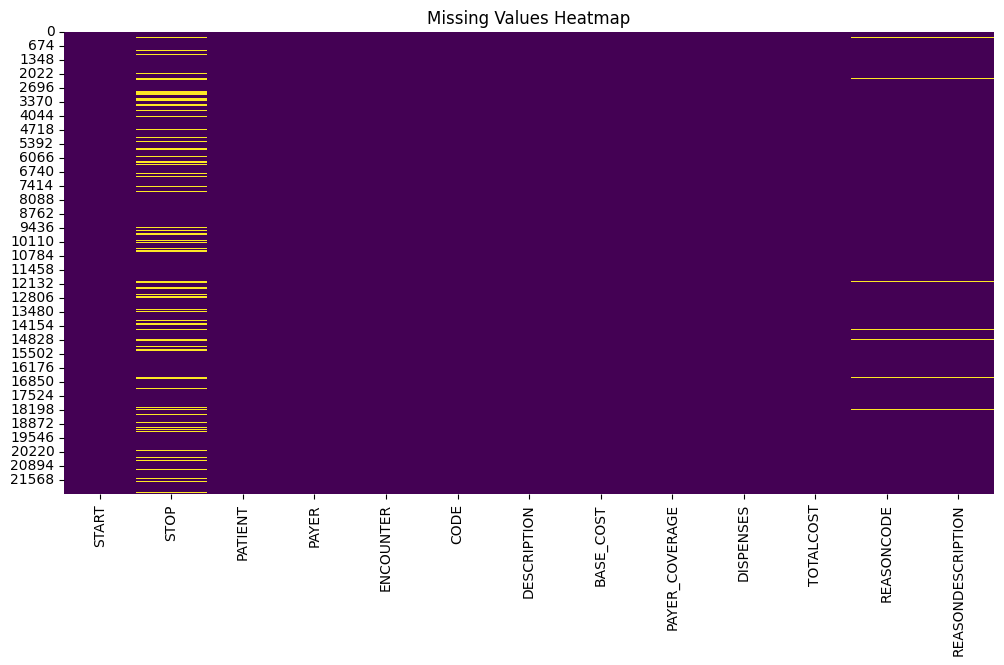

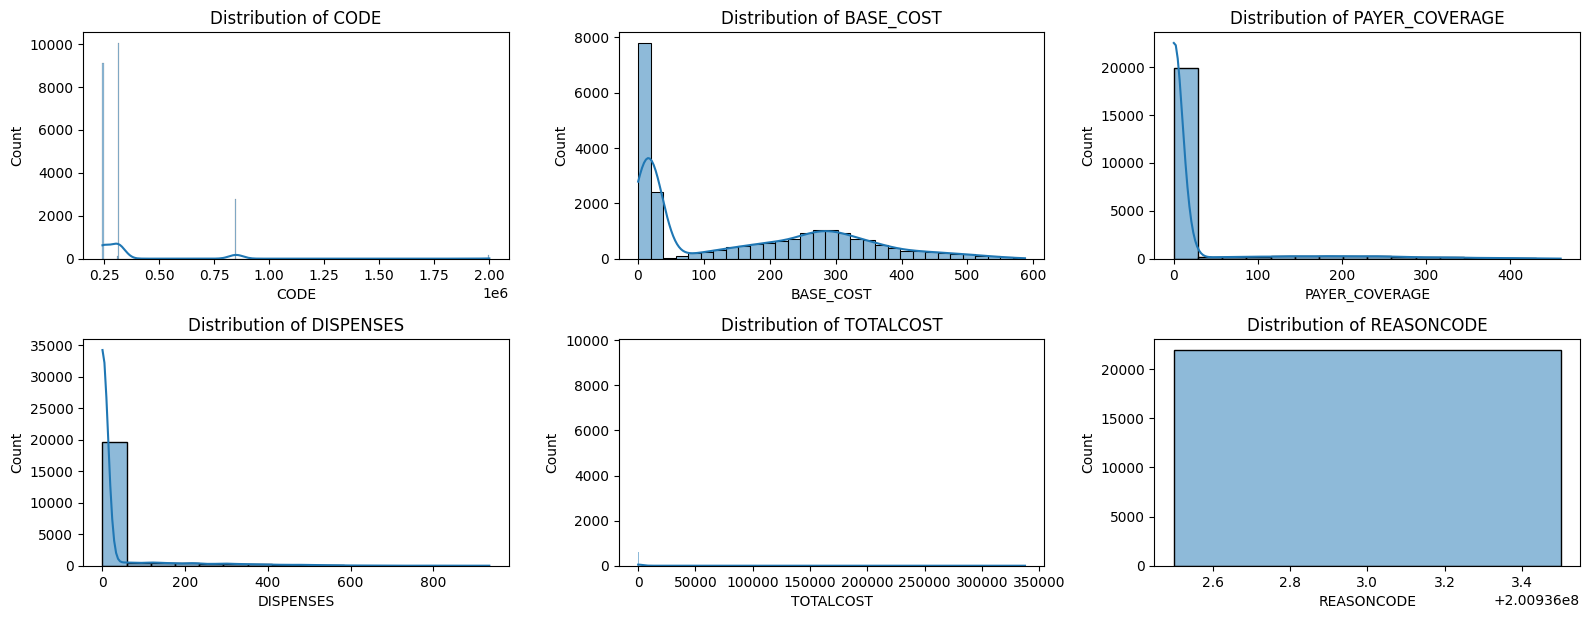

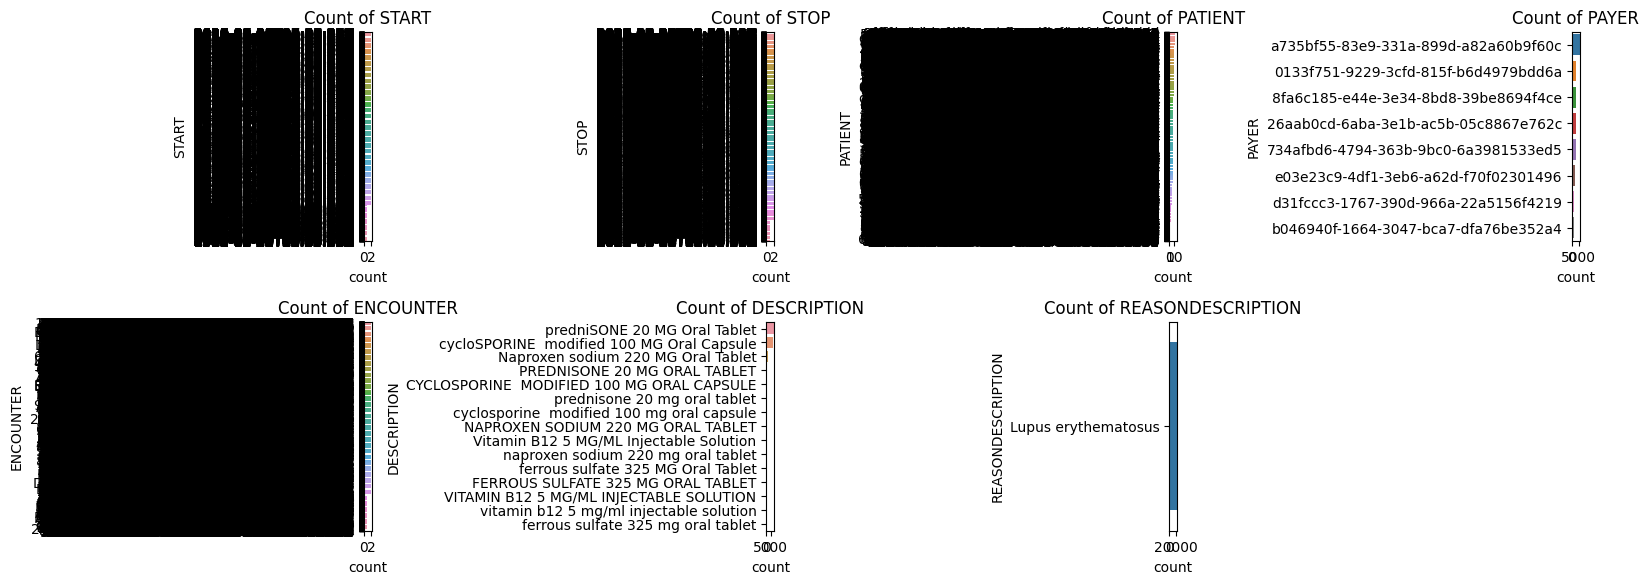

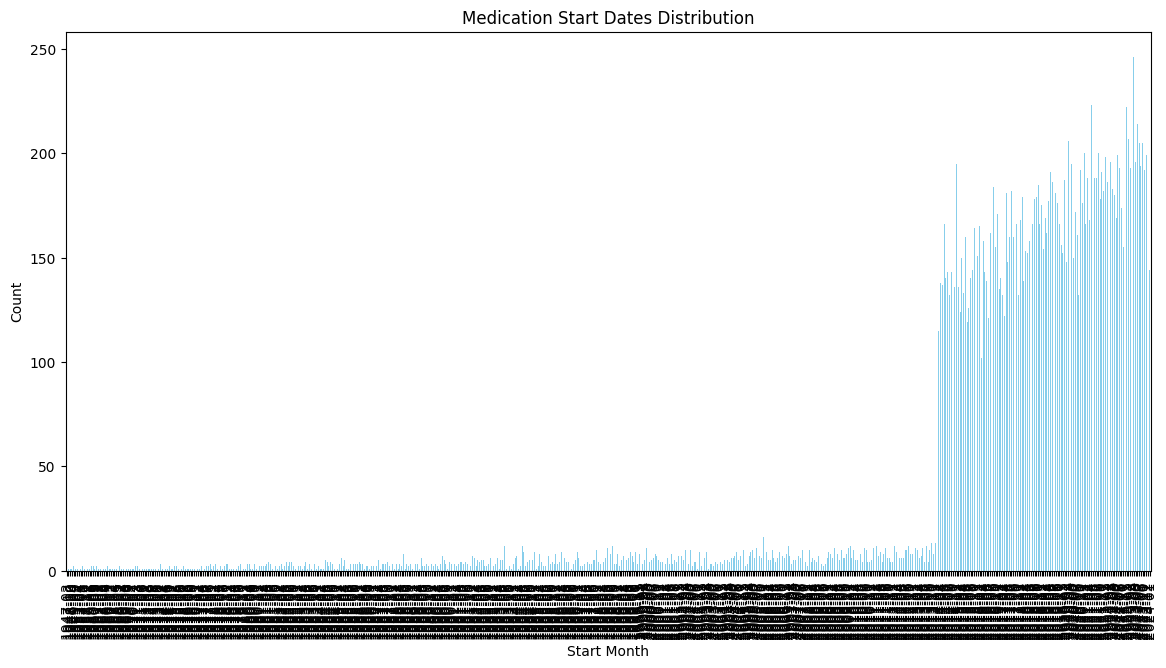

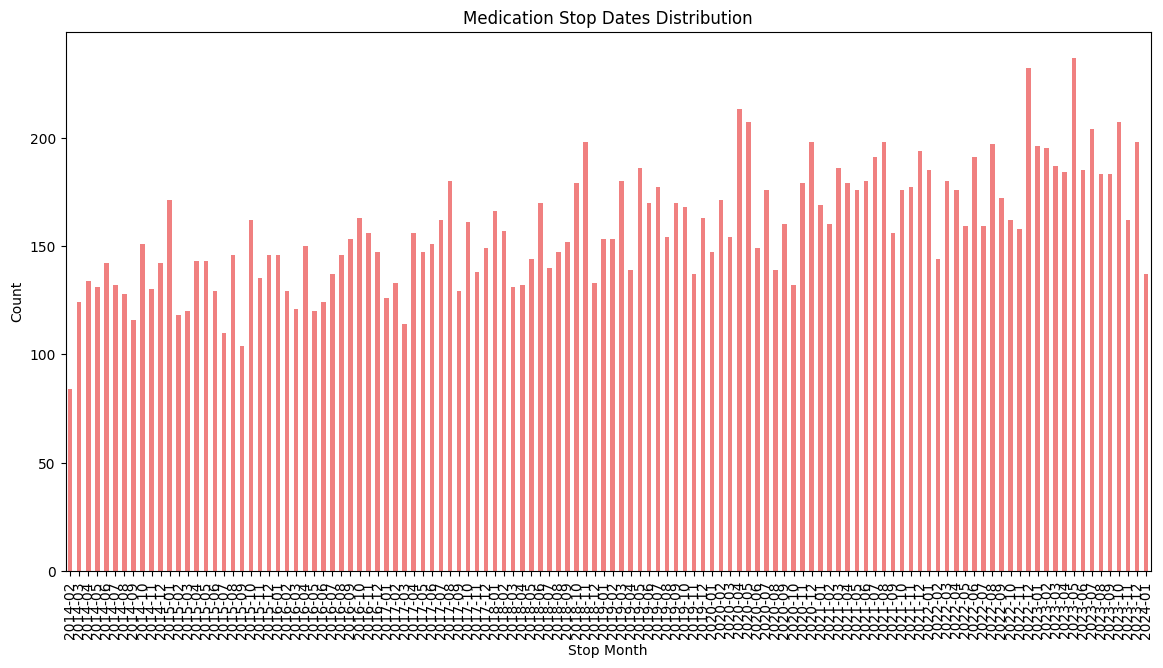

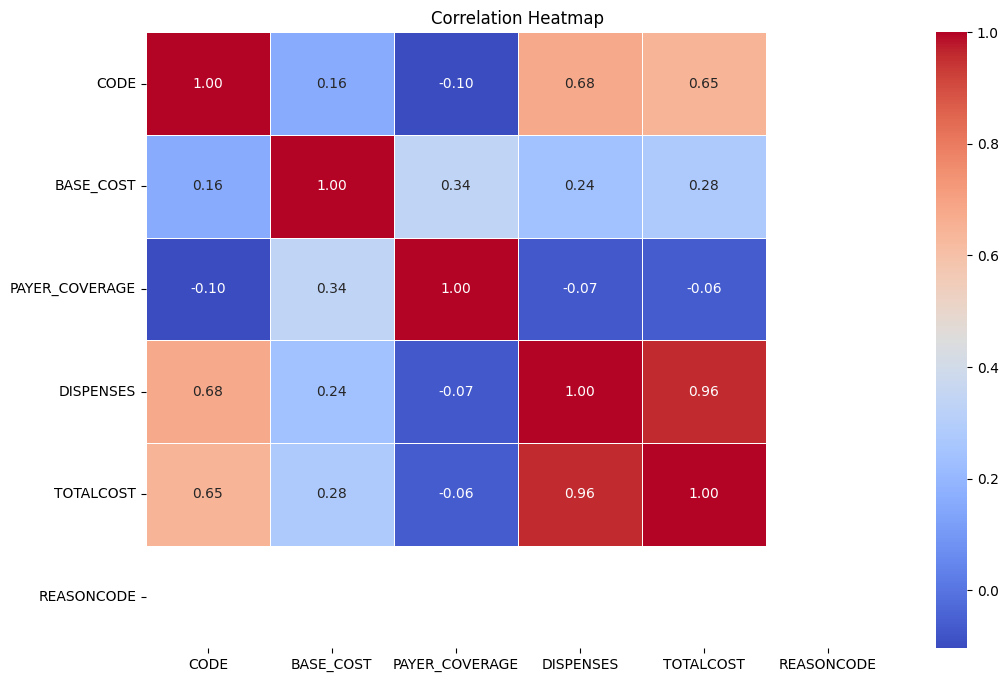

In [5]:
# 3. Visualizations

# 3.1 Missing Values Heatmap
def plot_missing_values(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

plot_missing_values(medications_df)

# 3.2 Distribution of Numerical Columns
def plot_numerical_distributions(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(medications_df)

# 3.3 Count of Categorical Columns
def plot_categorical_counts(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    plt.figure(figsize=(16, 20))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(7, 4, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

plot_categorical_counts(medications_df)

# 3.4 Time Series Analysis of Medication Start and Stop Dates
def plot_time_series(df):
    # Convert 'START' and 'STOP' to datetime
    df['START'] = pd.to_datetime(df['START'], errors='coerce')
    df['STOP'] = pd.to_datetime(df['STOP'], errors='coerce')
    
    # Plot distribution of medication periods
    plt.figure(figsize=(14, 7))
    df['START'].dropna().dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Medication Start Dates Distribution')
    plt.xlabel('Start Month')
    plt.ylabel('Count')
    plt.show()
    
    plt.figure(figsize=(14, 7))
    df['STOP'].dropna().dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='lightcoral')
    plt.title('Medication Stop Dates Distribution')
    plt.xlabel('Stop Month')
    plt.ylabel('Count')
    plt.show()

plot_time_series(medications_df)

# 3.5 Correlation Heatmap
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(medications_df)


In [6]:
print(medications_df.head())

                      START                      STOP  \
0 2020-04-22 02:47:09+00:00                       NaT   
1 2020-04-22 02:47:09+00:00 2020-05-17 02:47:09+00:00   
2 2021-08-01 02:47:09+00:00 2021-08-15 02:47:09+00:00   
3 2021-08-01 02:47:09+00:00 2021-08-15 02:47:09+00:00   
4 2023-05-18 02:47:09+00:00 2023-06-14 02:47:09+00:00   

                                PATIENT                                 PAYER  \
0  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
1  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
2  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
3  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   
4  28d7b56c-6056-d0a2-2991-39d6e917216c  0133f751-9229-3cfd-815f-b6d4979bdd6a   

                              ENCOUNTER    CODE  \
0  402DFAEB-1888-F562-4651-F75203EB1E28  849574   
1  402DFAEB-1888-F562-4651-F75203EB1E28  312615   
2  FBC2F3B3-AB93-

In [14]:
# Load datasets
medications_df = catalog.load("medications")
print("Medications data loaded..")

[07/22/24 16:48:08] INFO     Loading data from medications (CSVDataset)...                      ]8;id=879571;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=257415;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

Medications data loaded..


In [18]:
# Track the initial record count
total_records = len(medications_df)

# Column mapping
column_mapping = {
        'START': 'prescribing_date',
        'STOP': 'dispensing_date',
        'PATIENT': 'patient_id',
        'PAYER': 'payer_id',
        'ENCOUNTER': 'encounter_id',
        'CODE': 'medication_code',
        'DESCRIPTION': 'medication_description',
        'BASE_COST': 'base_cost',
        'PAYER_COVERAGE': 'payer_coverage',
        'DISPENSES': 'dispenses',
        'TOTALCOST': 'total_cost',
        'REASONCODE': 'reason_code',
        'REASONDESCRIPTION': 'reason_description'
}

# Rename columns
medications_df.rename(columns=column_mapping, inplace=True)

# Convert DATE columns to datetime format
medications_df['dispensing_date'] = pd.to_datetime(medications_df['dispensing_date'], errors='coerce')
medications_df['prescribing_date'] = pd.to_datetime(medications_df['prescribing_date'], errors='coerce')

summary = {
    'total_records': total_records,
    'invalid_dates_prescribing_removed': medications_df['prescribing_date'].isna().sum(),
    'invalid_dates_dispensing_removed': medications_df['dispensing_date'].isna().sum(),
    'negative_base_cost_removed': len(medications_df[medications_df['base_cost'] < 0]),
    'negative_total_cost_removed': len(medications_df[medications_df['total_cost'] < 0]),
    'invalid_date_order_removed': len(medications_df[medications_df['prescribing_date'] > medications_df['dispensing_date']]),
    'missing_source_description_filled': medications_df['medication_description'].isna().sum(),
    'duplicate_records': medications_df.duplicated().sum(),
    'outliers_removed':  len(medications_df[(medications_df['payer_coverage'] < lower_bound_payer_coverage) | (medications_df['payer_coverage'] > upper_bound_payer_coverage)]) + \
                         len(medications_df[(medications_df['dispenses'] < lower_bound_dispenses) | (medications_df['dispenses'] > upper_bound_dispenses)]) + \
                         len(medications_df[(medications_df['base_cost'] < lower_bound_base_cost) | (medications_df['base_cost'] > upper_bound_base_cost)])
}



# Remove duplicate records
duplicate_records = medications_df.duplicated().sum()
medications_df.drop_duplicates(inplace=True)
print("duplicate_records",duplicate_records)


# Track the initial record count
total_records = len(medications_df)

# Calculate invalid and missing data counts
invalid_dates_dispensing_removed = medications_df['prescribing_date'].isna().sum()
invalid_dates_prescribing_removed = medications_df['dispensing_date'].isna().sum()
negative_base_cost_removed = len(medications_df[medications_df['base_cost'] < 0])
negative_total_cost_removed = len(medications_df[medications_df['total_cost'] < 0])
invalid_date_order_removed = len(medications_df[medications_df['prescribing_date'] > medications_df['dispensing_date']])
missing_source_description_filled = medications_df['medication_description'].isna().sum()


# Remove invalid invalid date, base_cost and total_cost values
medications_df = medications_df[medications_df['prescribing_date'] <= medications_df['dispensing_date']]
medications_df = medications_df[medications_df['total_cost'] >= 0]
medications_df = medications_df[medications_df['total_cost'] >= 0]

# Check for duplicate records
duplicate_count = medications_df.duplicated().sum()

# Remove outliers
Q1_payer_coverage = medications_df['payer_coverage'].quantile(0.25)
Q3_payer_coverage = medications_df['payer_coverage'].quantile(0.75)
IQR_payer_coverage = Q3_payer_coverage - Q1_payer_coverage
lower_bound_payer_coverage = Q1_payer_coverage - 1.5 * IQR_payer_coverage
upper_bound_payer_coverage = Q3_payer_coverage + 1.5 * IQR_payer_coverage
payer_coverage_outliers_removed = len(medications_df[(medications_df['payer_coverage'] < lower_bound_payer_coverage) | (medications_df['payer_coverage'] > upper_bound_payer_coverage)])
medications_df = medications_df[(medications_df['payer_coverage'] >= lower_bound_payer_coverage) & (medications_df['payer_coverage'] <= upper_bound_payer_coverage)]

Q1_dispenses = medications_df['dispenses'].quantile(0.25)
Q3_dispenses = medications_df['dispenses'].quantile(0.75)
IQR_dispenses = Q3_dispenses - Q1_dispenses
lower_bound_dispenses = Q1_dispenses - 1.5 * IQR_dispenses
upper_bound_dispenses = Q3_dispenses + 1.5 * IQR_dispenses
dispenses_outliers_removed = len(medications_df[(medications_df['dispenses'] < lower_bound_dispenses) | (medications_df['dispenses'] > upper_bound_dispenses)])
medications_df = medications_df[(medications_df['dispenses'] >= lower_bound_dispenses) & (medications_df['dispenses'] <= upper_bound_dispenses)]

Q1_base_cost = medications_df['base_cost'].quantile(0.25)
Q3_base_cost = medications_df['base_cost'].quantile(0.75)
IQR_base_cost = Q3_base_cost - Q1_base_cost
lower_bound_base_cost = Q1_base_cost - 1.5 * IQR_base_cost
upper_bound_base_cost = Q3_base_cost + 1.5 * IQR_base_cost
base_cost_outliers_removed = len(medications_df[(medications_df['base_cost'] < lower_bound_base_cost) | (medications_df['base_cost'] > upper_bound_base_cost)])
medications_df = medications_df[(medications_df['base_cost'] >= lower_bound_base_cost) & (medications_df['base_cost'] <= upper_bound_base_cost)]

outliers_removed =  payer_coverage_outliers_removed + dispenses_outliers_removed + base_cost_outliers_removed

# Standardize medication description
initial_count = medications_df['medication_description'].isna().sum()
medications_df['medication_description'] = medications_df['medication_description'].str.strip().str.title()
missing_source_description_filled = initial_count - medications_df['medication_description'].isna().sum()

print(summary)
print('final_record_count',len(medications_df))


duplicate_records 0
{'total_records': 22237, 'invalid_dates_prescribing_removed': 0, 'invalid_dates_dispensing_removed': 3219, 'negative_base_cost_removed': 0, 'negative_total_cost_removed': 0, 'invalid_date_order_removed': 0, 'missing_source_description_filled': 0, 'duplicate_records': 0, 'outliers_removed': 8055}
final_record_count 14285
